In [ ]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv('Maternal_Health_Risk_Data-Set.csv')

# check the dimension of the data
print(data.shape)

# return the first 5 rows of the data
data.head()

(1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Attributes Description:
Age - Age in years when a woman is pregnant
SystolicBP - Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy
DiastolicBP - Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy
BS - Blood glucose levels is in terms of a molar concentration, mmol/L
BodyTemp - Body temperature in Fahrenheit
HeartRate - Resting heart rate in beats per minute
RiskLevel - Predicted Risk Intensity Level during pregnancy ['high risk', 'mid risk', 'low risk']

In [3]:
# high level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
# convert the column `BodyTemp` to celcius unit
data['BodyTemp'] = data['BodyTemp'].apply(lambda x: round((x-32) * (5/9), 2))

In [5]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.67,86,high risk
1,35,140,90,13.0,36.67,70,high risk
2,29,90,70,8.0,37.78,80,high risk
3,30,140,85,7.0,36.67,70,high risk
4,35,120,60,6.1,36.67,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.67,80,high risk
1010,55,120,90,18.0,36.67,60,high risk
1011,35,85,60,19.0,36.67,86,high risk
1012,43,120,90,18.0,36.67,70,high risk


In [6]:
from sklearn.preprocessing import LabelEncoder

# 2. Convertir las etiquetas de texto a números
le = LabelEncoder()
data['RiskLevel_encoded'] = le.fit_transform(data['RiskLevel'])

In [7]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_encoded
0,25,130,80,15.0,36.67,86,high risk,0
1,35,140,90,13.0,36.67,70,high risk,0
2,29,90,70,8.0,37.78,80,high risk,0
3,30,140,85,7.0,36.67,70,high risk,0
4,35,120,60,6.1,36.67,76,low risk,1
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.67,80,high risk,0
1010,55,120,90,18.0,36.67,60,high risk,0
1011,35,85,60,19.0,36.67,86,high risk,0
1012,43,120,90,18.0,36.67,70,high risk,0


0 = High Risk

1 = Low Risk

2 = Mid Risk

In [8]:
# perform train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=122)

# check the dimension of the train and test dataset after splitting
print('Training dataset: ', train.shape)
print('Test dataset: ', test.shape)

Training dataset:  (811, 8)
Test dataset:  (203, 8)


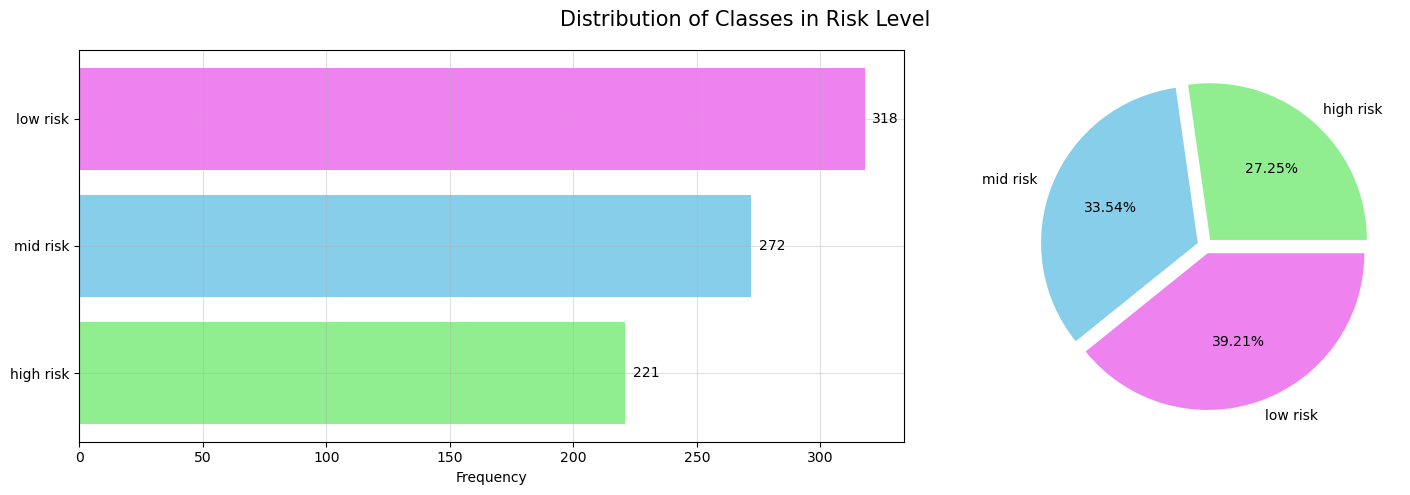

In [9]:
# visualize the distribution of classes in target/label feature (to check if the dataset is imbalanced)
risk = train['RiskLevel'].value_counts().sort_values()

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=risk.index, width=risk.values, color=['lightgreen','skyblue','violet'])
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)

for index, values in enumerate(risk):
    axes[0].text(values+3, index, str(values), va='center')

axes[1].pie(risk.values, labels=risk.index, colors=['lightgreen','skyblue','violet'], autopct='%.2f%%', explode=[0.05,0.05,0.05])
figure.suptitle('Distribution of Classes in Risk Level', fontsize=15)
plt.tight_layout()
plt.show()

In [10]:
# segregate the feature matrix and target vector from the train and test datasets
Xtrain = train.drop(columns=['RiskLevel', 'RiskLevel_encoded'], axis=1)
ytrain = train['RiskLevel_encoded']

Xtest = test.drop(columns=['RiskLevel', 'RiskLevel_encoded'], axis=1)
ytest = test['RiskLevel_encoded']

print('Xtrain: ', Xtrain.shape)
print('ytrain: ', ytrain.shape)
print('Xtest:', Xtest.shape)
print('ytest: ',ytest.shape)

Xtrain:  (811, 6)
ytrain:  (811,)
Xtest: (203, 6)
ytest:  (203,)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy:  0.8002650912671363


In [9]:
# evaluate the best model on the test set
test_accuracy = best_forest.score(Xtest, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.8078817733990148


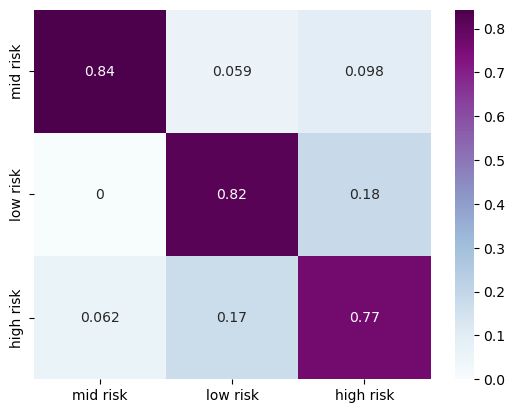

In [10]:
from sklearn.metrics import confusion_matrix

# visualize the confusion matrix using a heatmap
ypred = best_forest.predict(Xtest)

labels = ytest.unique()

cm_forest = confusion_matrix(ytest, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar el modelo de Random Forest.

model = RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=122  # Mantén el mismo random_state para reproducibilidad
)
# 2. Entrenar el modelo con los datos de entrenamiento
print("Entrenando el modelo...")
model.fit(Xtrain, ytrain)
print("Entrenamiento completado.")


Entrenando el modelo...
Entrenamiento completado.


In [13]:
import joblib
# 3. Guardar el modelo entrenado
model_filename = 'maternal_health_risk_model_v2.joblib'
joblib.dump(model, model_filename)
print(f"Modelo guardado como '{model_filename}'.")

Modelo guardado como 'maternal_health_risk_model_v2.joblib'.


In [14]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(Xtest)

# 2. Evaluar el rendimiento del modelo
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print("\n--- Evaluación del Modelo ---")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print("\nInforme de Clasificación:")
print(report)


--- Evaluación del Modelo ---
Precisión (Accuracy): 0.81

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.84      0.82      0.83        88
           2       0.70      0.77      0.73        64

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203



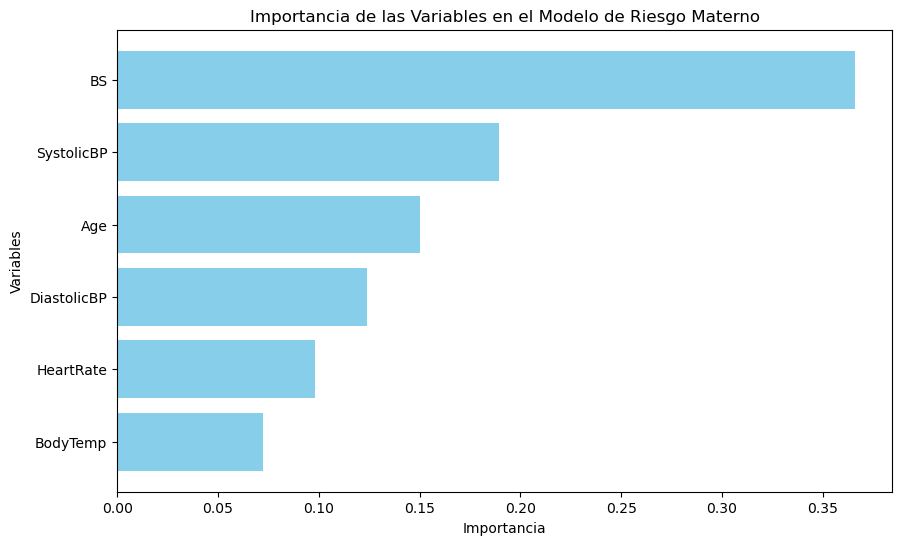

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Obtener la importancia de las variables desde el modelo entrenado
# La variable 'model' es tu modelo RandomForestClassifier ya entrenado
importances = model.feature_importances_

# 2. Obtener los nombres de las variables
# Xtrain es el DataFrame de entrenamiento que contiene tus variables
feature_names = Xtrain.columns

# 3. Crear un DataFrame o lista para facilitar la visualización
# Esto es opcional, pero ayuda a ordenar los datos
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 4. Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en el Modelo de Riesgo Materno')
plt.gca().invert_yaxis()  # Invierte el eje y para que la variable más importante quede arriba
plt.show()